# Apache Spark

Apache Spark is a unified computing engine and a set of libraries for parallel data processing on computer clusters. It supports multiple widely used programming languages (Python, Java, Scala, and R), includes libraries for diverse tasks ranging from SQL to streaming and machine learning, and runs anywhere from a laptop to a cluster of thousands of servers. This makes it an easy system to start with and scale-up to big data processing or incredibly large scale.

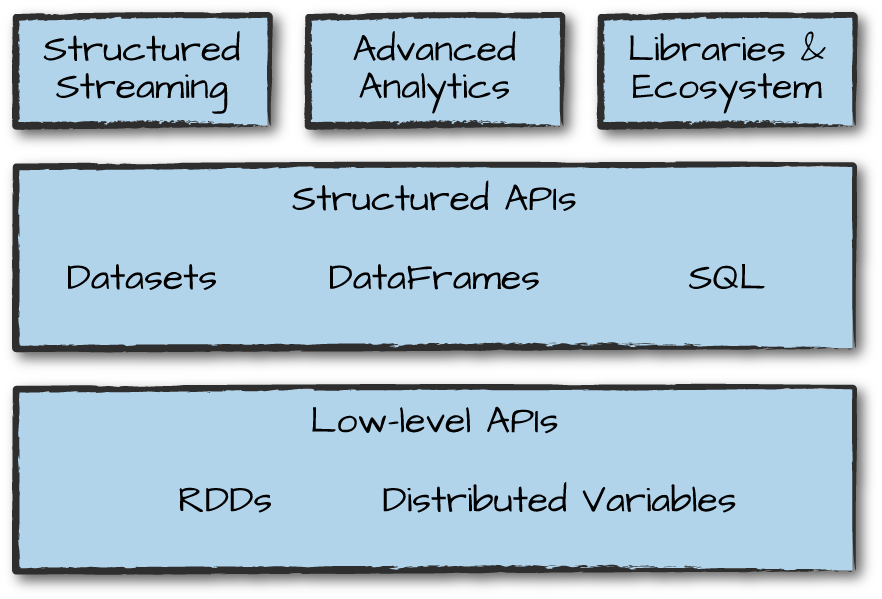

In [1]:
from IPython.display import Image
Image(filename='images/spark_components.png') 

The idea of a commodity cluster for data processing is very important to Spark. Single machines do not have enough power and resources to perform computations on huge amounts of information (or the user probably does not have the time to wait for the computation to finish). A cluster, or group, of computers, pools the resources of many machines together, giving us the ability to use all the cumulative resources as if they were a single computer. Now, a group of machines alone is not powerful, you need a framework to coordinate work across them. Spark does just that, managing and coordinating the execution of tasks on data across a cluster of computers.

The cluster of machines that Spark will use to execute tasks is managed by a cluster manager like Spark’s standalone cluster manager, YARN, or Mesos. We then submit Spark Applications to these cluster managers, which will grant resources to our application so that we can complete our work.

Knowing that it runs on a cluster, you can imagine that we have several applications running on the same cluster. A Spark Applications consist of a driver process and a set of executor processes. The driver process runs your `main() function`, sits on a node in the cluster, and is responsible for three things: maintaining information about the Spark Application; responding to a user’s program or input; and analyzing, distributing, and scheduling work across the executors. The driver process is absolutely essential—it’s the heart of a Spark Application and maintains all relevant information during the lifetime of the application.

The executors are responsible for actually carrying out the work that the driver assigns them. This means that each executor is responsible for only two things: executing code assigned to it by the driver, and reporting the state of the computation on that executor back to the driver node.

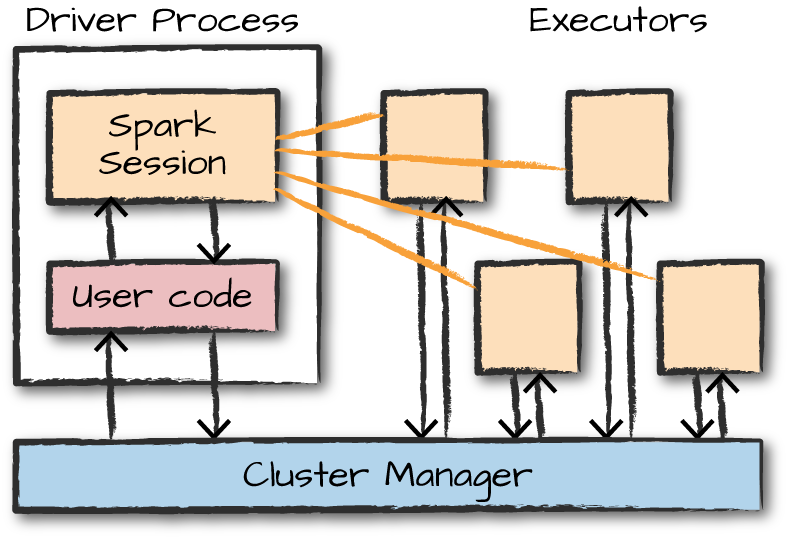

In [17]:
Image(filename='images/spark_app.png') 

## How to install and run locally?

You can find several tutorials online. Just google for the OS you are (Windows, Mac OS X, Ubuntu, ...) and the spark version you want to run.
Since Spark 2.1 you can just do a `pip install pyspark` on Python and you have a running version of it on Unix Based systems. :-)

Spark has several core abstractions: Datasets, DataFrames, SQL Tables, and Resilient Distributed Datasets (RDDs). These different abstractions all represent distributed collections of data. The easiest and most efficient are DataFrames, which are available in all languages.

### Partitions
To allow every executor to perform work in parallel, Spark breaks up the data into chunks called partitions. A partition is a collection of rows that sit on one physical machine in your cluster. A `DataFrame`’s partitions represent how the data is physically distributed across the cluster of machines during execution. If you have one partition, Spark will have a parallelism of only one, even if you have thousands of executors.

An important thing to note is that with DataFrames you do not manipulate partitions manually or individually. You simply specify high-level transformations of data in the physical partitions, and Spark determines how this work will actually execute on the cluster.

### Transformation

In Spark, the core data structures are immutable, meaning they cannot be changed after they’re created. This might seem like a strange concept at first: if you cannot change it, how are you supposed to use it? To “change” a DataFrame, you need to instruct Spark how you would like to modify it to do what you want. These instructions are called *transformations*.

In [1]:
import pyspark

sc = pyspark.SparkContext()

In [2]:
sqlc = pyspark.SQLContext(sc)

In [3]:
myRange = sqlc.range(1000).toDF("number")

In [4]:
divisBy2 = myRange.where("number % 2 = 0")

Notice that these return no output. This is because we specified only an abstract transformation, and Spark will not act on transformations until we call an *action*. Transformations are the core of how you express your business logic using Spark. There are two types of transformations: those that specify **narrow** dependencies (1 to 1), and those that specify **wide** dependencies (1 to n)

**Spark is Lazy**. Lazy evaluation means that Spark will wait until the very last moment to execute the graph of computation instructions. Instead of modifying the data immediately when you express some operation, you build up a *plan* of transformations that you would like to apply to your source data. By waiting until the last minute to execute the code, Spark compiles this plan from your raw `DataFrame` transformations to a streamlined physical plan that will run as efficiently as possible across the cluster. This provides immense benefits because Spark can optimize the entire data flow from end to end.

### Action

Transformations allow us to build up our logical transformation plan. To trigger the computation, we run an *action*. An action instructs Spark to compute a result from a series of transformations. The simplest action is count, which gives us the total number of records in the DataFrame:

In [5]:
divisBy2.count()

500

There are 3 types of actions:
<ol>
  <li>view data in console</li>
  <li>collect data to native objects in the respective language</li>
  <li>write to output data sources</li>
</ol>

### Breadth First Search

An algorithm that finds connections and degrees of separations between nodes.
So let's talk about superheros. We have a dataset with the following structure:
    HeroId | HeroID thatappeared on the first magazine

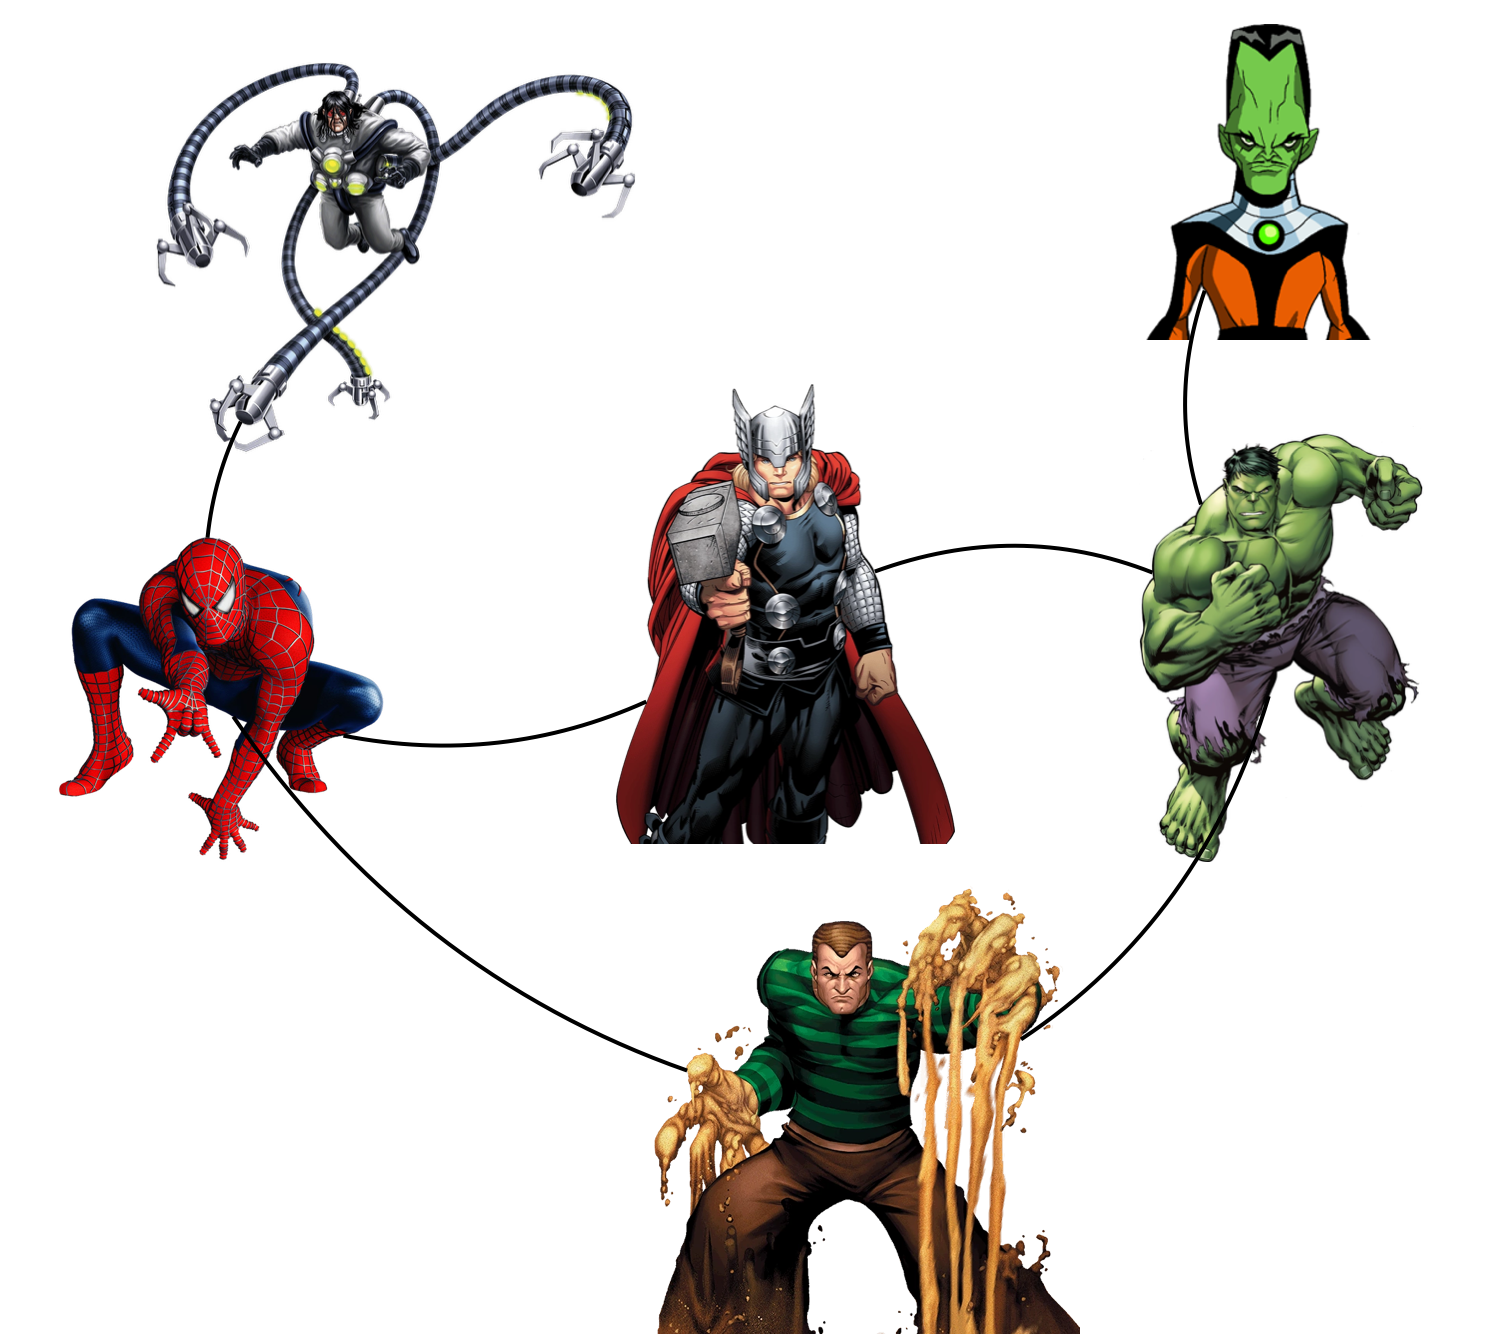

In [7]:
Image(filename='images/marvel_graph.png') 

Treating a superhero as a node, you can start at a node and go iterating over and over it to fetch the shortest path to your target node. How? Check `social-graph-hero.py`.